# TP 3 AI29/IQ01 

### Exercice 4

Dans cet exercice, nous cherchons à illustrer le théorème de non-clonage quantique, qui établit l'impossibilité de cloner un état quantique arbitraire sans le détruire, c'est-à-dire sans perdre l'information initiale.

Dans le bloc de code ci-dessous, nous initialisons un circuit quantique comprenant 3 qubits et 2 bits classiques. Ensuite, nous procédons à l'initialisation du premier qubit (q0) en lui attribuant des valeurs aléatoires pour les coefficients alpha et beta, tout en veillant à respecter la condition fondamentale selon laquelle la somme des carrés de ces coefficients doit être égale à 1 (c'est-à-dire, alpha^2 + beta^2 = 1).

In [1]:
from qiskit import *
import math
import random
c = ClassicalRegister(2)
q= QuantumRegister(3, name='q')
qc = QuantumCircuit(q,c)
alpha=random.random()
beta=math.sqrt(1-(alpha**2))
qc.initialize([alpha,beta],0)
print("alpha",alpha,"beta",beta)
qc.draw('mpl')

alpha 0.7594617833788255 beta 0.6505519192094155


Cette section vise à visualiser les états quantiques de chaque qubit du circuit quantique. On peut observer que le premier qubit (q0) présente un état aléatoire, tandis que les qubits q1 et q2 sont initialement dans l'état |0⟩.

In [2]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
plot_bloch_multivector(outputstate, title="Sphère de bloch")

Nous implémontons le circuit dans cette phase. 
- intialisation du qubit q0 avec des valeurs aléatoires pour les coefficients alpha et beta, initialisation des qubits q1 et q2 dans l'état |0⟩
- porte hadamard pour le deuxième qubit (q1) 
- porte CNOT avec le deuxième qubit (q1) comme contrôle et le troisème qubit (q2) comme cible
- porte CNOT avec le premier qubit (q0) comme contrôle et le deuxième qubit (q1) comme cible
- porte hadamard sur le premier qubit (q0)
- mesure des qubits q0 et q1 sur les registres classiques c1 et c0 respectivement
- une porte X (bit-flip) au troisième qubit (q2) sous une condition spécifique déterminée par les résultats de mesure c0.
- une porte Z au troisième qubit (q2) sous une condition spécifique déterminée par les résultats de mesure c1.

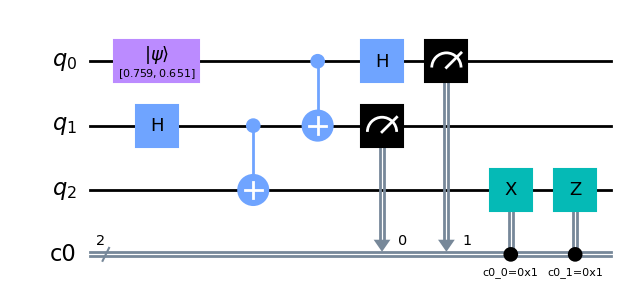

In [3]:
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure(0,1)
qc.measure(1,0)
qc.x(2).c_if(c[0], 1)
qc.z(2).c_if(c[1], 1)
qc.draw('mpl')


Finalement, nous illustrons les états quantiques de chaque qubit du circuit quantique. On peut observer que le troisième qubit comporte le même état que l'état initial du premier qubit (q0), tandis que l'état du qubit q0 est différent de son état initial. Cette observation confirme le théorème de non-clonage quantique, qui stipule que la duplication exacte de l'état quantique d'un qubit n'est pas possible dans la mécanique quantique.

In [4]:
from qiskit.visualization import plot_bloch_multivector
from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
plot_bloch_multivector(outputstate, title="New Bloch Sphere")
